# 📘 Notebook : K-Means Clustering avec données SQL Server
Ce notebook charge les données depuis la base de données `HealthCareDW`, table `dbo.Dim_Patient`, et applique un clustering K-Means.

In [1]:
# ✅ Étape 1 : Installer pyodbc (à exécuter une seule fois si besoin)
!pip install pyodbc


In [2]:
import pandas as pd
import pyodbc
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import pyodbc

# ✅ Connexion à l’instance par défaut MSSQLSERVER sur ta machine
server = 'LAPTOP-6NHNSTN4'
database = 'HealthCareDW'

conn_str = f"""
DRIVER={{ODBC Driver 17 for SQL Server}};
SERVER={server};
DATABASE={database};
Trusted_Connection=yes;
"""

conn = pyodbc.connect(conn_str)
df = pd.read_sql("SELECT * FROM dbo.Dim_Patient", conn)
df.head()


C:\Users\amami\AppData\Local\Temp\ipykernel_27080\520307431.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM dbo.Dim_Patient", conn)


,Patient_pk,Code_Patient,Gender,dod,dob,HeightInMeters,WeightInKilograms,SmokerStatus,ECigaretteUsage,AlcoholDrinkers,Email,City,AdmissionType,AdmissionLocation,Diagnosis,hospital_expire_flag,Religion,Age
0,1,10006,F,2165-08-12,2094-03-05,1.63,84.820000,Former,Never,0,update,Los Angeles,EMERGENCY,EMERGENCY ROOM ADMIT,SEPSIS,0,CATHOLIC,71
1,2,10011,F,2126-08-28,2090-06-05,1.60,71.669998,Former,Never,0,jane.**smith#@squarespace.**com,San Francisco,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HEPATITIS B,1,CATHOLIC,36
2,3,10013,F,2125-10-07,2038-09-03,1.78,71.209999,Never,Never,1,michael.**johnson#@zendesk.**com,Boston,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SEPSIS,1,CATHOLIC,87
3,4,10017,F,2152-09-12,2075-09-21,1.78,95.250000,Former,Never,0,emily.**davis#@zoom.**com,Houston,EMERGENCY,EMERGENCY ROOM ADMIT,HUMERAL FRACTURE,0,CATHOLIC,77
4,5,10019,M,2163-05-15,2114-06-20,1.68,78.019997,Never,Never,0,david.**brown#@alibaba.**com,Houston,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,ALCOHOLIC HEPATITIS,1,CATHOLIC,49


C:\Users\amami\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


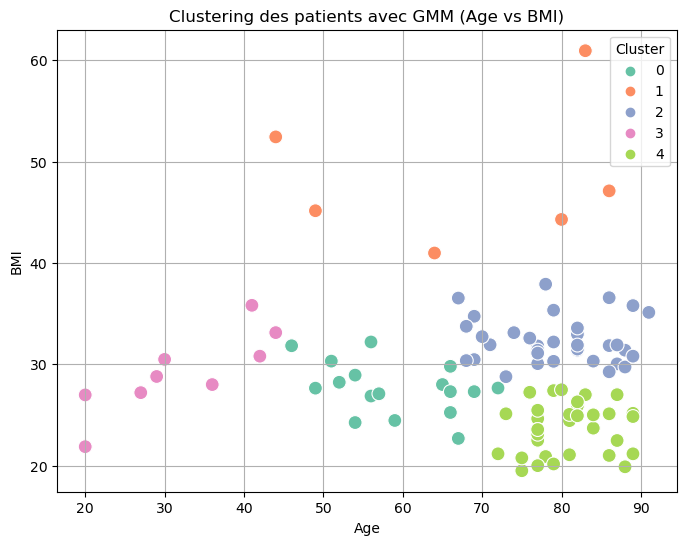

In [5]:
# 📌 Étape 2 : Nettoyage et calcul du BMI
df['BMI'] = df['WeightInKilograms'] / (df['HeightInMeters'] ** 2)
age_median = df[df['Age'] <= 100]['Age'].median()
df.loc[df['Age'] > 100, 'Age'] = age_median

# 📌 Étape 3 : Sélection et normalisation des données
df_filtered = df[['Age', 'BMI']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered)

# 📌 Étape 4 : Clustering avec GMM (4 composantes)
gmm = GaussianMixture(n_components=5, random_state=42)
df_filtered['Cluster'] = gmm.fit_predict(X_scaled)

# 📌 Étape 5 : Visualisation avec axe X gradué tous les 5 ans
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='Age', y='BMI', hue='Cluster', palette='Set2', s=100)
plt.title("Clustering des patients avec GMM (Age vs BMI)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


In [6]:
df_filtered.to_excel("GMM_Result.xlsx", index=False)
